---

## Get data in...

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)
        
get_json('/Users/helenalexandrablythe/Football/test2.json')

with open('/Users/helenalexandrablythe/Football/test2.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

    df = json_normalize(d['elements'])
print ('Columns: \n', list(df), '\n')
print ('Dataframe Head: \n', df.head())

['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types']
Columns: 
 ['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index'] 

Dataframe Head: 
    chance_of_playing_next_round  chance_of_playing_th

---

### Get rid of unused columns & rename useful ones:

In [2]:
df = df.drop(['assists','element_type','saves','team_code','code','web_name','special','red_cards','id','photo','clean_sheets','goals_conceded','goals_scored','minutes','own_goals','penalties_missed','penalties_saved','points_per_game','squad_number','status','value_form','value_season','yellow_cards'], axis=1)
df['name'] = df['first_name']+' '+df['second_name']
df = df.drop(['first_name', 'second_name'],axis=1)


df.rename(columns={'now_cost' : 'price','transfers_in_event': 'gw_transfers_in', 'transfers_out_event':'gw_transfers_out'}, inplace=True)

df.team = df.team.map({'1':'Arsenal', '2':'Bournemouth','3':'Brighton','4':'Burnley',
                       '5':'Cardiff','6':'Chelsea','7':'CrystalPal','8':'Everton','9':'Fulham','10':'Huddersfield', 
                       '11':'Leicester','12':'Liverpool', '13':'ManCity','14':'ManUtd','15':'Newcastle',
                       '16':'Southampton','17':'Spurs','18':'Watford','19':'WestHam','20':'Wolves'})

### Make sure all numerical columns in the right format:

In [3]:
df['team'] = df['team'].apply(lambda x: str(x))
df['ict_index'] = df['ict_index'].apply(lambda x: float(x))
df['creativity'] = df['creativity'].apply(lambda x: float(x))
df['influence'] = df['influence'].apply(lambda x: float(x))
df['threat'] = df['threat'].apply(lambda x: float(x))
df['form'] = df['form'].apply(lambda x: float(x))
df['selected_by_percent'] = df['selected_by_percent'].apply(lambda x: float(x))

---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 29 columns):
chance_of_playing_next_round    470 non-null float64
chance_of_playing_this_round    466 non-null float64
cost_change_event               623 non-null int64
cost_change_event_fall          623 non-null int64
cost_change_start               623 non-null int64
cost_change_start_fall          623 non-null int64
dreamteam_count                 623 non-null int64
ep_next                         623 non-null object
ep_this                         623 non-null object
event_points                    623 non-null int64
form                            623 non-null float64
in_dreamteam                    623 non-null bool
news                            623 non-null object
news_added                      470 non-null object
price                           623 non-null int64
selected_by_percent             623 non-null float64
team                            623 non-null object
total_points    

---

# Visualisation:

- Total Points
- Value
- Form weighted points
- Gameweek points
    
### TOTAL POINTS

In [15]:
vis_points_price = df.groupby(['name','price'])['total_points'].mean().sort_values(ascending=False).head(20)

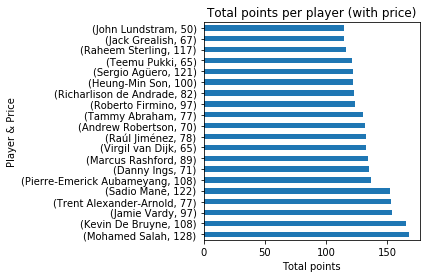

In [16]:
vis_points_price.plot(kind='barh')
plt.title('Total points per player (with price)')
plt.xlabel('Total points')
plt.ylabel('Player & Price')
plt.gcf().subplots_adjust(left=0.4)
plt.savefig('vis_points_price.png', dpi=100, quality=100)

In [25]:
### df.groupby(['name','price'])['total_points'].mean().sort_values(ascending=False).head(30)

### VALUE

In [26]:
df['value'] = df['total_points']/df['price']

In [27]:
vis_value = df.groupby(['name','price'])['value'].mean().sort_values(ascending=False).head(20)

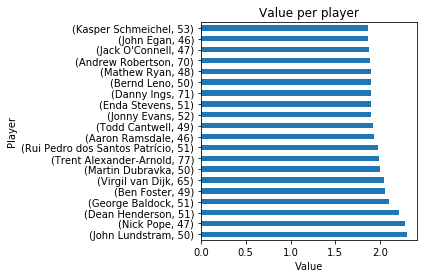

In [28]:
vis_value.plot(kind='barh')
plt.title('Value per player')
plt.xlabel('Value')
plt.ylabel('Player')
plt.gcf().subplots_adjust(left=0.4)
plt.savefig('vis_value', dpi=100, quality=100)

In [29]:
### df.groupby(['name','price'])['value'].mean().sort_values(ascending=False).head(30)

### FORM WEIGHTED POINTS

In [30]:
df['form_weighted_tp'] = df['form']*df['total_points']*(df['event_points']/10)

In [31]:
df.event_points.describe()

count    623.000000
mean       1.213483
std        2.304269
min       -1.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       17.000000
Name: event_points, dtype: float64

In [32]:
vis_formweighttp = df.groupby(['name','price'])['form_weighted_tp'].mean().sort_values(ascending=False).head(20)

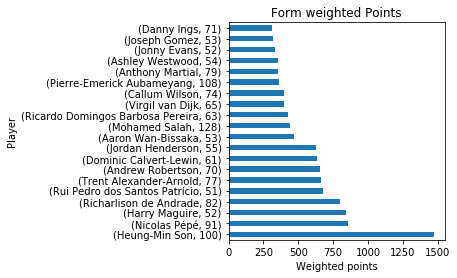

In [33]:
vis_formweighttp.plot(kind='barh')
plt.title('Form weighted Points')
plt.xlabel('Weighted points')
plt.ylabel('Player')
plt.gcf().subplots_adjust(left=0.4)
plt.savefig('vis_formweighttp', dpi=100, quality=100)

In [34]:
### df.groupby(['name','price'])['form_weighted_tp'].mean().sort_values(ascending=False).head(30)

### THIS GAMEWEEK

In [40]:
vis_thisweek = df.groupby(['name','price'])['event_points'].mean().sort_values(ascending=False).head(20)

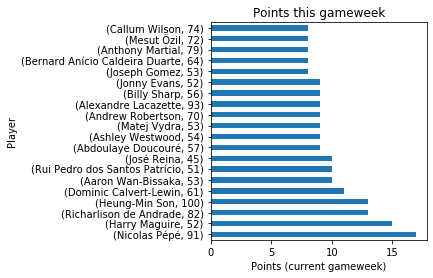

In [41]:
vis_thisweek.plot(kind='barh')
plt.title('Points this gameweek')
plt.xlabel('Points (current gameweek)')
plt.ylabel('Player')
plt.gcf().subplots_adjust(left=0.4)
plt.savefig('vis_formweighttp', dpi=100, quality=100)

In [42]:
### df.groupby(['name','price'])['event_points'].mean().sort_values(ascending=False).head(30)

---

## Dreamteam analysis

In [93]:
df.dreamteam_count.unique()

array([0, 1, 2, 3, 4, 6, 5])

In [94]:
dreamteam_4 = df.loc[df['dreamteam_count'] >3]
dreamteam_5 = df.loc[df['dreamteam_count'] >4]
dreamteam_6 = df.loc[df['dreamteam_count'] >5]

print(dreamteam_6.name)
print(dreamteam_5.name)
print(dreamteam_4.name)

250      Jamie Vardy
282    Mohamed Salah
283       Sadio Mané
Name: name, dtype: object
250               Jamie Vardy
273    Trent Alexander-Arnold
282             Mohamed Salah
283                Sadio Mané
314           Kevin De Bruyne
503             Heung-Min Son
Name: name, dtype: object
176             Tammy Abraham
250               Jamie Vardy
265               Ayoze Pérez
273    Trent Alexander-Arnold
282             Mohamed Salah
283                Sadio Mané
309             Sergio Agüero
313           Raheem Sterling
314           Kevin De Bruyne
316              Riyad Mahrez
339           Marcus Rashford
364        Federico Fernández
435            John Lundstram
439                John Fleck
503             Heung-Min Son
608              Adama Traoré
Name: name, dtype: object


---
## News analysis

#### News column to eliminate players who are not playing...

In [107]:
def left_team(text):
    if ('joined' in text.lower()):
        return True
    else:
        return False

df['left_team'] = df.news.map(left_team)

def injury(text):
    if ('injury' in text.lower()) or ('knock' in text.lower()):
        return True
    else:
        return False

df['injury'] = df.news.map(injury)

def illness(text):
    if ('illness' in text.lower()):
        return True
    else:
        return False

df['illness'] = df.news.map(illness)

print("Illness:", df.illness.value_counts())
print("Injured:", df.injury.value_counts())
print("Left team:", df.left_team.value_counts())

Illness: False    620
True       3
Name: illness, dtype: int64
Injured: False    558
True      65
Name: injury, dtype: int64
Left team: False    531
True      92
Name: left_team, dtype: int64


In [108]:
df=pd.get_dummies(df, columns=['left_team','injury','illness'])

In [101]:
left = df.loc[df['left_team_True'] >0]
injured = df.loc[df['left_team_True'] >0]
ill = df.loc[df['left_team_True'] >0]

False    558
True      65
Name: injury, dtype: int64

False    620
True       3
Name: illness, dtype: int64

In [31]:
df = df[df['left_team'] == False]

In [32]:
'''df = df[df['illness'] == False]
df = df[df['injury'] == False]'''

"df = df[df['illness'] == False]\ndf = df[df['injury'] == False]"

In [34]:
''''df=pd.get_dummies(df, columns=['country','variety'])'''

"'df=pd.get_dummies(df, columns=['country','variety'])"

In [35]:
df.event_points.head

<bound method NDFrame.head of 0      5
1      8
2      0
3      0
4      0
      ..
606    0
607    0
608    0
609    0
610    0
Name: event_points, Length: 539, dtype: int64>